# TFRecord Testing Station

To-do:
- train, val, test split

I'm hoping to gain more insight into TFRecord and how to properly use them, 'cause right now, it doesn't seem to really work out that well and I don't know why

In [14]:
import tensorflow as tf
import tensorboard as tb
import os

from pathlib import Path

import matplotlib.pyplot as plt
import datetime

from functools import partial

import numpy as np
from sklearn.model_selection import train_test_split, KFold
import pandas as pd

In [13]:
path_to_tfr = Path("/Volumes/BrainMets/Rgb_Brain_Mets/brain_mets_classification/derivatives/TFRecords/patient_data_2classes.tfrecord")

In [9]:
feature_description = {
    "image": tf.io.FixedLenFeature([155, 240, 240, 4], tf.float32), # formerly: [149, 185, 155, 4]
    "sex": tf.io.FixedLenFeature([2], tf.int64, default_value=[0,0]),
    "age": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "primary": tf.io.FixedLenFeature([], tf.int64, default_value=0),
}

data = tf.data.TFRecordDataset([path_to_tfr], compression_type="GZIP")

def parse_record(record):
    return tf.io.parse_single_example(record, feature_description)

data = data.map(parse_record)

data = data.shuffle(buffer_size=1000)

data = data.batch(4)

data = data.prefetch(buffer_size=1)

In [10]:
for record in data.take(1):
    print(record["sex"].numpy())
    print(record["age"].numpy())
    print(record["primary"].numpy())

2024-06-04 12:40:11.397293: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:21: Filling up shuffle buffer (this may take a while): 26 of 1000
2024-06-04 12:40:31.353378: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:21: Filling up shuffle buffer (this may take a while): 76 of 1000
2024-06-04 12:40:41.463648: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:21: Filling up shuffle buffer (this may take a while): 102 of 1000
2024-06-04 12:41:01.113769: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:21: Filling up shuffle buffer (this may take a while): 152 of 1000
2024-06-04 12:41:11.370729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:21: Filling up shuffle buffer (this may take a while): 177 of 1000
2024-06-04 12:41:31.277364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:21: Filling up shuffle buffer (this may take a wh

[[0 1]
 [1 0]
 [0 1]
 [1 0]]
[68 63 56 66]
[0 1 0 1]


In [18]:
trainig_fold_paths = [
    "/Users/LennartPhilipp/Desktop/Uni/Prowiss/Data.tmp/3D_CNN_whole/fold_2.tfrecord",
    "/Users/LennartPhilipp/Desktop/Uni/Prowiss/Data.tmp/3D_CNN_whole/fold_3.tfrecord"
]

val_fold_path = "/Users/LennartPhilipp/Desktop/Uni/Prowiss/Data.tmp/3D_CNN_whole/fold_1.tfrecord"

test_fold_path = "/Users/LennartPhilipp/Desktop/Uni/Prowiss/Data.tmp/3D_CNN_whole/fold_0.tfrecord"

feature_description = {
    "image": tf.io.FixedLenFeature([155, 240, 240, 4], tf.float32), # formerly: [149, 185, 155, 4]
    "sex": tf.io.FixedLenFeature([2], tf.int64, default_value=[0,0]),
    "age": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "primary": tf.io.FixedLenFeature([], tf.int64, default_value=0),
}

data = tf.data.TFRecordDataset([trainig_fold_paths], compression_type="GZIP")

def parse_record(record):
    return tf.io.parse_single_example(record, feature_description)

data = data.map(parse_record)

data = data.shuffle(buffer_size=1000)

data = data.batch(10)

data = data.prefetch(buffer_size=1)

for record in data.take(1):
    print(record["sex"].numpy())
    print(record["age"].numpy())
    print(record["primary"].numpy())

[[1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
[71 30 58 66 25 47]
[1 0 0 0 0 1]


## one file per patient

In [3]:
#path_to_tfr_folder = Path("/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords/all_pats_single")
path_to_tfr_folder = Path("/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords")

### Get all tfrecord files

In [4]:
tfr_file_names = [file for file in os.listdir(path_to_tfr_folder) if file.endswith(".tfrecord")]


tfr_paths = [str(path_to_tfr_folder) + "/" + file for file in tfr_file_names]
for file in tfr_paths:
    print(file)

print(f"total: {len(tfr_paths)}")

/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01025630.tfrecord
/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01251946.tfrecord
/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01214417.tfrecord
/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01022787.tfrecord
/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01231700.tfrecord
/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01134825.tfrecord
/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01288245.tfrecord
/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01281168.tfrecord
/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01357275.tfrecord
/Users/LennartPhilipp/Deskto

### K-Fold cross validation

In [10]:
# Assume `tfrecord_paths` is the array containing all paths to the TFRecord files
# Example: tfrecord_paths = np.array(['path1', 'path2', ..., 'pathN'])

# Step 1: Shuffle and split the dataset into training and test sets
test_size = 0.1  # 20% of the data will be used as the test set
#tfrecord_paths = np.array(['path1', 'path2', 'path3', 'path4', 'path5', 'path6', 'path7', 'path8', 'path9', 'path10']) # Example paths

tfr_paths = np.array(tfr_paths)
train_paths, test_paths = train_test_split(tfr_paths, test_size=test_size, random_state=42)

print(len(tfr_paths))

print("Training Paths: ", train_paths)
print(len(train_paths))
print("Test Paths: ", test_paths)
print(len(test_paths))

# Step 2: Apply k-fold cross-validation on the training set
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(train_paths)):
    train_fold = train_paths[train_index]
    val_fold = train_paths[val_index]
    
    print(f"Fold {fold + 1}")
    print("Training Fold: ", len(train_fold))
    print("Validation Fold: ", len(val_fold))

    for val_path in val_fold:
        if val_path in train_fold:
            print("WARNING: Duplicate path in train and val fold!")


109
Training Paths:  ['/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01882333.tfrecord'
 '/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01025630.tfrecord'
 '/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01040149.tfrecord'
 '/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01243841.tfrecord'
 '/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01190738.tfrecord'
 '/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01015961.tfrecord'
 '/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01199093.tfrecord'
 '/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub-01169240.tfrecord'
 '/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/remote_tfrecords/sub

### train / val / test split

In [16]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_size = int(len(tfr_paths) * train_ratio)
val_size = int(len(tfr_paths) * val_ratio)
test_size = int(len(tfr_paths) * test_ratio)

train_paths = tfr_paths[:train_size]
val_paths = tfr_paths[train_size:train_size + val_size]
test_paths = tfr_paths[train_size + val_size:]

print(len(train_paths))
print(len(val_paths))
print(len(test_paths))
sum = len(train_paths) + len(val_paths) + len(test_paths)
print(f"sum = {sum}")

87
10
12
sum = 109


### Data augmentation

In [17]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode = "horizontal"),
    tf.keras.layers.RandomBrightness(factor = (-0.2, 0.2), value_range=(0, 1)),
    #tf.keras.layers.RandomContrast(0.5), # consider removing the random contrast layer as that causes pixel values to go beyond 1
    tf.keras.layers.RandomRotation(factor = (-0.07, 0.07), fill_mode = "nearest"),
    tf.keras.layers.RandomTranslation(
        height_factor = 0.05,
        width_factor = 0.05,
        fill_mode = "nearest"
    )
])

In [18]:
batch_size = 5

### Normal parsing etc.

In [19]:
feature_description = {
    "image": tf.io.FixedLenFeature([155, 240, 240, 4], tf.float32),
    "sex": tf.io.FixedLenFeature([2], tf.int64, default_value=[0,0]),
    "age": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "primary": tf.io.FixedLenFeature([], tf.int64, default_value=0),
}

train_data = tf.data.TFRecordDataset([tfr_paths], compression_type="GZIP")
val_data = tf.data.TFRecordDataset([val_paths], compression_type="GZIP")
test_data = tf.data.TFRecordDataset([test_paths], compression_type="GZIP")

def parse_record(record, labeled = False):
    example = tf.io.parse_single_example(record, feature_description)
    image = example["image"]
    image = tf.reshape(image, [155, 240, 240, 4])
    image = data_augmentation(image)
    if labeled:
        return (image, example["sex"], example["age"]), example["primary"]
        #return image, example["primary"] 
    else:
        return image

train_data = train_data.map(partial(parse_record, labeled = True))
val_data = val_data.map(partial(parse_record, labeled = True))
test_data = test_data.map(partial(parse_record, labeled = True))

#data = data.repeat()

train_data = train_data.shuffle(buffer_size=100)
val_data = val_data.shuffle(buffer_size=100)
test_data = test_data.shuffle(buffer_size=100)

train_data = train_data.batch(1)
val_data = val_data.batch(1)
test_data = test_data.batch(1)

train_data = train_data.prefetch(buffer_size=1)
val_data = val_data.prefetch(buffer_size=1)
test_data = test_data.prefetch(buffer_size=1)

### Interleave

In [20]:
feature_description = {
    "image": tf.io.FixedLenFeature([155, 240, 240, 4], tf.float32),
    "sex": tf.io.FixedLenFeature([2], tf.int64, default_value=[0,0]),
    "age": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "primary": tf.io.FixedLenFeature([], tf.int64, default_value=0),
}

train_data = tf.data.Dataset.from_tensor_slices(train_paths)
train_data = train_data.interleave(lambda x: tf.data.TFRecordDataset([x], compression_type="GZIP"),
    num_parallel_calls=tf.data.AUTOTUNE,
    deterministic=False)

val_data = tf.data.Dataset.from_tensor_slices(val_paths)
val_data = val_data.interleave(lambda x: tf.data.TFRecordDataset([x], compression_type="GZIP"),
    num_parallel_calls=tf.data.AUTOTUNE,
    deterministic=False)

# train_data = tf.data.TFRecordDataset([tfr_paths], compression_type="GZIP")
# val_data = tf.data.TFRecordDataset([val_paths], compression_type="GZIP")
# test_data = tf.data.TFRecordDataset([test_paths], compression_type="GZIP")

def parse_record(record, labeled = False):
    example = tf.io.parse_single_example(record, feature_description)
    image = example["image"]
    image = tf.reshape(image, [155, 240, 240, 4])
    image = data_augmentation(image)
    if labeled:
        return (image, example["sex"], example["age"]), example["primary"]
        #return image, example["primary"] 
    else:
        return image

train_data = train_data.map(partial(parse_record, labeled = True), num_parallel_calls=tf.data.AUTOTUNE)
val_data = val_data.map(partial(parse_record, labeled = True))
# test_data = test_data.map(partial(parse_record, labeled = True))

# #data = data.repeat()

train_data = train_data.shuffle(buffer_size=100)
val_data = val_data.shuffle(buffer_size=100)
# test_data = test_data.shuffle(buffer_size=100)

train_data = train_data.batch(batch_size)
val_data = val_data.batch(1)
# test_data = test_data.batch(1)

train_data = train_data.prefetch(buffer_size=1)
val_data = val_data.prefetch(buffer_size=1)
# test_data = test_data.prefetch(buffer_size=1)

In [18]:
#[train_image], [train_sex], [train_age], [train_primary] = train_data.take(1)
train_data.take(1)

<_TakeDataset element_spec=((TensorSpec(shape=(None, 155, 240, 240, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

<_TakeDataset element_spec=((TensorSpec(shape=(None, 155, 240, 240, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


2024-06-19 10:34:43.546170: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:96: Filling up shuffle buffer (this may take a while): 19 of 100
2024-06-19 10:35:03.515095: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:96: Filling up shuffle buffer (this may take a while): 57 of 100
2024-06-19 10:35:19.243370: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


[0 1]
37
0


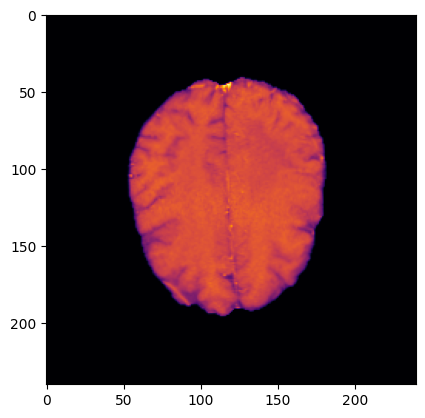

In [20]:
train_data = train_data.take(1)
print(train_data)
for (image, sex, age,), primary in train_data:
    print(sex.numpy()[0])
    print(age.numpy()[0])
    print(primary.numpy()[0])
    numpy_image = image.numpy()
    plt.imshow(numpy_image[0][100, :, :, 0], cmap="inferno")

<_TakeDataset element_spec=(TensorSpec(shape=(None, 155, 240, 240, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
[0 1]
68
0


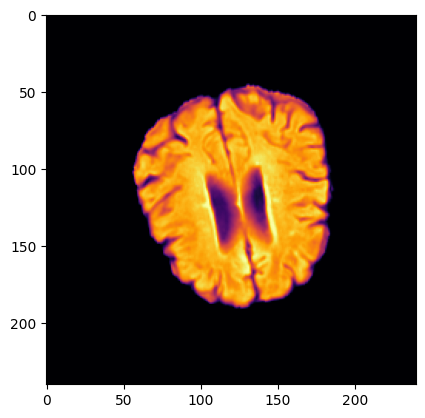

In [8]:
test_data = test_data.take(1)
print(test_data)
for image, sex, age, primary in test_data:
    print(sex.numpy()[0])
    print(age.numpy()[0])
    print(primary.numpy()[0])
    numpy_image = image.numpy()
    plt.imshow(numpy_image[0][100, :, :, 0], cmap="inferno")

In [21]:
activation_func = "relu"
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [105]:
train_images, others = data.take(2)
#print(train_images)
others[3].numpy()
#train_images = train_images[0]

array([1])

In [25]:
log_dir = "/Users/LennartPhilipp/Desktop/testing_data/derivatives/TFRecords.tmp/tensorboard_logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq="epoch",
    profile_batch="10,100",
)

2024-06-19 12:44:15.178490: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-06-19 12:44:15.178509: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-06-19 12:44:15.178813: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


## Simple model

In [26]:
batch_norm_layer = tf.keras.layers.BatchNormalization()
conv_1_layer = tf.keras.layers.Conv3D(filters = 64, kernel_size = 7, input_shape = [155, 240, 240, 4], strides=(2,2,2), activation=activation_func, kernel_initializer=tf.keras.initializers.HeNormal())
max_pool_1_layer = tf.keras.layers.MaxPooling3D(pool_size = (2,2,2))
conv_2_layer = tf.keras.layers.Conv3D(filters = 64, kernel_size = 7, strides=(2,2,2), activation=activation_func, kernel_initializer=tf.keras.initializers.HeNormal())
max_pool_2_layer = tf.keras.layers.MaxPooling3D(pool_size = (2,2,2))
dense_1_layer = tf.keras.layers.Dense(100, activation=activation_func, kernel_initializer=tf.keras.initializers.HeNormal())
dropout_1_layer = tf.keras.layers.Dropout(0.5)
dense_2_layer = tf.keras.layers.Dense(100, activation=activation_func, kernel_initializer=tf.keras.initializers.HeNormal())
dropout_2_layer = tf.keras.layers.Dropout(0.5)
output_layer = tf.keras.layers.Dense(2, activation="softmax")

# Define inputs
input_image = tf.keras.layers.Input(shape=(155, 240, 240, 4))
sex_input = tf.keras.layers.Input(shape=(2,))
age_input = tf.keras.layers.Input(shape=(1,))

# concatenate input sex and input age

batch_norm = batch_norm_layer(input_image)
conv_1 = conv_1_layer(batch_norm)
max_pool_1 = max_pool_1_layer(conv_1)
conv_2 = conv_2_layer(max_pool_1)
max_pool_2 = max_pool_2_layer(conv_2)

flattened_images = tf.keras.layers.Flatten()(max_pool_2)
flattened_sex_input = tf.keras.layers.Flatten()(sex_input)
age_input_reshaped = tf.keras.layers.Reshape((1,))(age_input)  # Reshape age_input to have 2 dimensions
concatenated_inputs = tf.keras.layers.Concatenate()([flattened_images, age_input_reshaped, flattened_sex_input])

dense_1 = dense_1_layer(concatenated_inputs)
dropout_1 = dropout_1_layer(dense_1)
dense_2 = dense_2_layer(dropout_1)
dropout_2 = dropout_2_layer(dense_2)
output = output_layer(dropout_2)



model = tf.keras.Model(inputs = [input_image, sex_input, age_input], outputs = [output])
model.compile(loss="mse", optimizer=optimizer, metrics = ["RootMeanSquaredError", "accuracy"])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 155, 240, 240, 4)]   0         []                            
                                                                                                  
 batch_normalization_2 (Bat  (None, 155, 240, 240, 4)     16        ['input_7[0][0]']             
 chNormalization)                                                                                 
                                                                                                  
 conv3d_4 (Conv3D)           (None, 75, 117, 117, 64)     87872     ['batch_normalization_2[0][0]'
                                                                    ]                             
                                                                                            

In [27]:
# model.fit(train_data, validation_data = val_data, epochs=20, batch_size=1,)
model.fit(train_data, validation_data = val_data, epochs=20, batch_size=batch_size, callbacks = [tensorboard_callback], verbose=1)

Epoch 1/20


2024-06-19 12:44:53.256192: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:298: Filling up shuffle buffer (this may take a while): 60 of 100
2024-06-19 12:44:55.696090: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


      8/Unknown - 233s 27s/step - loss: 0.4698 - root_mean_squared_error: 0.6854 - accuracy: 0.3750

KeyboardInterrupt: 

In [27]:
score = model.evaluate(test_data)

2/2 [==============================] - 3s 529ms/step - loss: 0.2500 - root_mean_squared_error: 0.5000 - accuracy: 0.5037


# Learning Rate Visualization

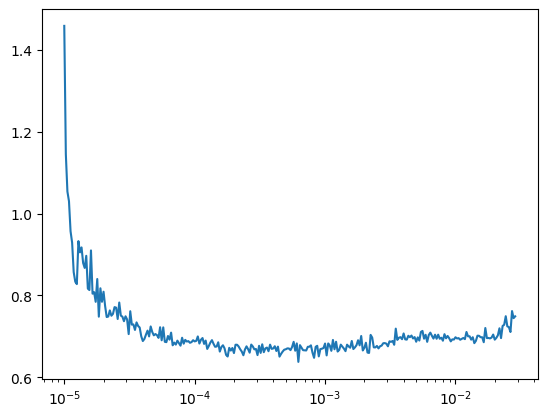

In [13]:
path_to_np = "/Users/LennartPhilipp/Desktop/history.npy"

history = np.load(path_to_np, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])

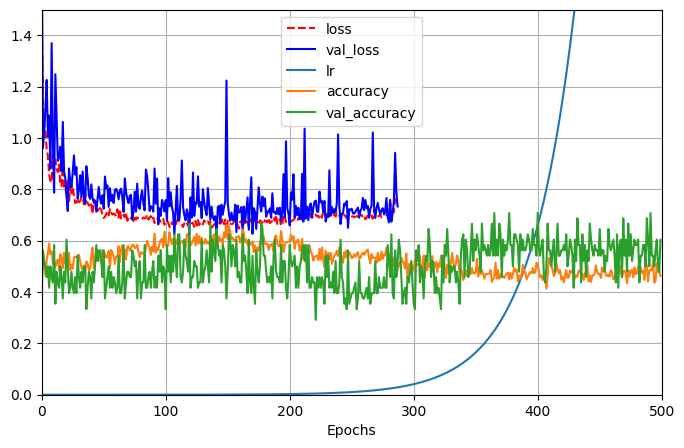

In [21]:
pd.DataFrame(history)[["loss","val_loss","lr","accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,500),
                           ylim=(0,1.5),
                           grid=True,
                           xlabel="Epochs",
                           style=["r--","b-"],)
plt.show()